In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%unzip /content/student_resource.zip -d /content/

UsageError: Line magic function `%unzip` not found.


In [ ]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/student_resource.zip'
extract_path = '/content/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Successfully extracted {zip_file_path} to {extract_path}")

Successfully extracted /content/drive/MyDrive/student_resource.zip to /content/


In [ ]:
import pandas as pd
df = pd.read_csv('/content/student_resource/dataset/train.csv')

# Display the first few rows of the DataFrame
display(df.head())

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [ ]:
df.shape[0]

75000

In [ ]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Check for null values in each column
print("\nNull values per column:")
print(df.isnull().sum())

Number of duplicate rows: 0

Null values per column:
sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64


In [ ]:
# Reduce the dataset to 20,000 rows by random sampling
df_reduced = df.sample(n=20000, random_state=42) # Using a random_state for reproducibility

# Display the first few rows of the reduced DataFrame
display(df_reduced.head())

# Display the shape of the reduced DataFrame
print("\nShape of the reduced DataFrame:", df_reduced.shape)

,sample_id,catalog_content,image_link,price
26837,158784,"Item Name: Log Cabin Sugar Free Syrup, 24 FL O...",https://m.media-amazon.com/images/I/71QD2OFXqD...,12.195
2592,4095,Item Name: Raspberry Ginseng Oolong Tea (50 te...,https://m.media-amazon.com/images/I/813OiT8mdJ...,38.540
18359,172021,Item Name: Walden Farms Honey Dijon Dressing -...,https://m.media-amazon.com/images/I/71HGx42QmU...,17.860
73292,268276,Item Name: Vlasic Ovals Hamburger Dill Pickle ...,https://m.media-amazon.com/images/I/71AbnhXOTA...,2.940
60127,154791,"Item Name: Amoretti Premium Syrup, Grand Orang...",https://m.media-amazon.com/images/I/61c+aTE6TY...,25.990



Shape of the reduced DataFrame: (20000, 4)


In [ ]:
import os

target_directory = '/content/student_resource/dataset/train.csv'

# Create the target directory if it doesn't exist
os.makedirs(target_directory, exist_ok=True)

FileExistsError: [Errno 17] File exists: '/content/student_resource/dataset/train.csv'

In [ ]:
import pandas as pd
import os
import requests
from tqdm import tqdm

# Read your CSV file
df = df_reduced#pd.read_csv('/content/student_resource/dataset/train.csv')

# Create a folder to store downloaded images
output_dir = '/content/downloaded_train_images'
os.makedirs(output_dir, exist_ok=True)

# Loop through each image link and download
for idx, row in tqdm(df.iterrows(), total=len(df)):
    url = row['image_link']
    sample_id = row['sample_id']

    # Set the filename
    filename = os.path.join(output_dir, f"{sample_id}.jpg")

    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            with open(filename, 'wb') as f:
                f.write(response.content)
        else:
            print(f"Failed to download {url}")
    except Exception as e:
        print(f"Error downloading {url}: {e}")

print(" All images downloaded successfully!")

100%|██████████| 20000/20000 [27:55<00:00, 11.94it/s]

 All images downloaded successfully!


In [ ]:
import os

target_directory = '/content/student_resource/sample images' # Use the same target directory

# Count the number of saved images
saved_images_count = len([f for f in os.listdir(target_directory) if os.path.isfile(os.path.join(target_directory, f))])

print(f"Finished attempting to save images. Checked directory: {target_directory}")
print(f"Number of files in the target directory: {saved_images_count}")

NotADirectoryError: [Errno 20] Not a directory: '/content/student_resource/dataset/train.csv/33127.jpg'

In [ ]:
target_directory = '/content/student_resource/sample images/'
files_in_directory = os.listdir(target_directory)
number_of_files = len(files_in_directory)
expected_number_of_images = len(image_contents)

if number_of_files == expected_number_of_images:
    print(f"Successfully verified: {number_of_files} images found in the directory, matching the expected count of {expected_number_of_images}.")
else:
    print(f"Verification failed: Found {number_of_files} images, but expected {expected_number_of_images}.")

Successfully verified: 100 images found in the directory, matching the expected count of 100.


In [ ]:
df2 = pd.read_csv('/content/student_resource/dataset/sample_test_out.csv')

# Display the first few rows of the DataFrame
display(df2.head())

,sample_id,price
0,217392,62.080008
1,209156,17.189763
2,262333,96.501410
3,295979,5.652474
4,50604,23.794780


In [ ]:
df3 = pd.read_csv('/content/student_resource/dataset/train.csv')

# Display the first few rows of the DataFrame
display(df3.head())

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 21.1 MB/s eta 0:00:00


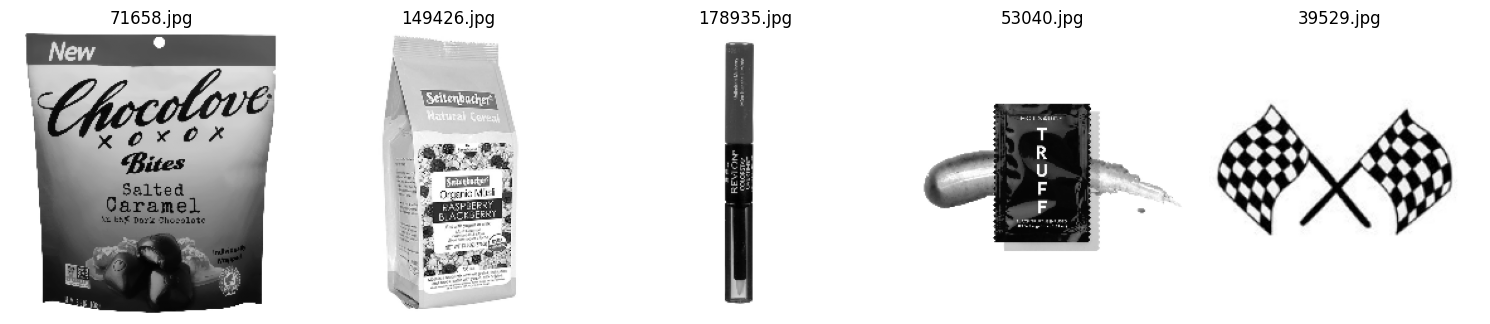

In [ ]:
import glob
import cv2
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import io, img_as_float
from matplotlib import pyplot as plt
import os
import numpy as np

# Path to image folder
path = "/content/downloaded_train_images"
image_files = glob.glob(os.path.join(path, '*'))

# Display first 5 denoised images
num_images_to_display = 5
plt.figure(figsize=(15, 5))

for i, file in enumerate(image_files[:num_images_to_display]):
    # Read grayscale image as float
    img = img_as_float(io.imread(file, as_gray=True))
    img=cv2.resize(img,(224,224))
    # Estimate noise sigma
    sigma_est = estimate_sigma(img, average_sigmas=True)

    # Apply Non-Local Means Denoising
    denoise = denoise_nl_means(
        img,
        h=1.15 * sigma_est,
        fast_mode=True,
        patch_size=5,
        patch_distance=3,
        channel_axis=None  # replaces multichannel=False
    )
    kernel=np.ones((5,5),np.float32)/25
    gaussian_kernel=np.array([[1/16,1/8,1]])
    # Display
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(denoise, cmap='gray')
    plt.title(os.path.basename(file))
    plt.axis('off')

plt.tight_layout()
plt.show()